In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2001.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2001,17982,277,29,3536
1,2001,17183,58,18,3508
2,2001,17922,339,25,3525
3,2001,17505,156,38,3563
4,2001,17821,205,33,3553
...,...,...,...,...,...
1833,2001,17862,222,41,3536
1834,2001,17680,284,28,3520
1835,2001,17371,133,21,3564
1836,2001,17726,121,30,3516


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1838, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1838 non-null   int64
 1   Maximum length (m))  1838 non-null   int64
 2   Recession(m),        1838 non-null   int64
 3   Rate/yr(m)           1838 non-null   int64
 4   Snout altitude (m)   1838 non-null   int64
dtypes: int64(5)
memory usage: 71.9 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1838


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()



,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2001,17982,277,29,3536
1,2001,17183,58,18,3508
2,2001,17922,339,25,3525
3,2001,17505,156,38,3563
4,2001,17821,205,33,3553


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0043,-0.0263,0.0091
"Recession(m),",NaN,-0.0043,1.0000,0.0296,-0.0034
Rate/yr(m),NaN,-0.0263,0.0296,1.0000,0.0205
Snout altitude (m),NaN,0.0091,-0.0034,0.0205,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0091
Recession(m),         -0.0043
Rate/yr(m)            -0.0263
Year                      NaN
Name: Maximum length (m)), dtype: float64

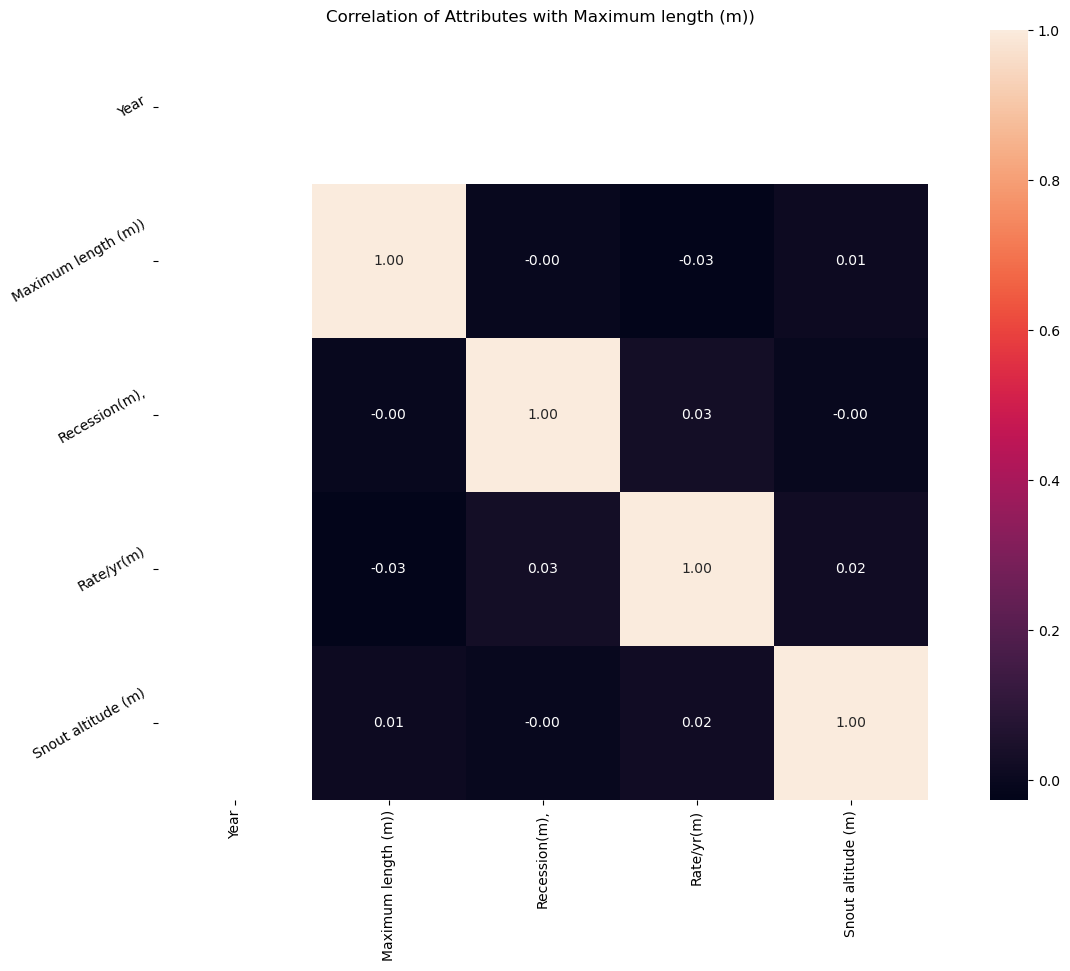

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,838.0000","1,838.0000","1,838.0000","1,838.0000","1,838.0000"
mean,"2,001.0000","17,559.9924",224.0337,27.7193,"3,531.0631"
std,0.0000,300.5315,126.8976,8.7195,20.3551
min,"2,001.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,001.0000","17,305.0000",119.0000,20.0000,"3,514.0000"
50%,"2,001.0000","17,561.0000",227.5000,28.0000,"3,530.0000"
75%,"2,001.0000","17,816.0000",333.0000,35.0000,"3,549.0000"
max,"2,001.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2001   1.0000
Name: Year, dtype: float64

315   0.0060
76    0.0054
175   0.0054
344   0.0049
130   0.0049
       ...  
231   0.0005
162   0.0005
100   0.0005
359   0.0005
420   0.0005
Name: Recession(m),, Length: 434, dtype: float64

40   0.0413
18   0.0392
21   0.0392
16   0.0392
29   0.0381
33   0.0381
37   0.0370
41   0.0359
42   0.0354
35   0.0354
25   0.0354
22   0.0348
34   0.0348
30   0.0343
32   0.0326
28   0.0321
14   0.0321
26   0.0316
39   0.0316
13   0.0310
24   0.0310
38   0.0305
36   0.0299
15   0.0299
17   0.0299
20   0.0294
27   0.0294
23   0.0277
19   0.0277
31   0.0256
Name: Rate/yr(m), dtype: float64

3514   0.0212
3516   0.0207
3499   0.0207
3557   0.0201
3530   0.0196
        ...  
3505   0.0092
3555   0.0092
3536   0.0087
3548   0.0087
3496   0.0027
Name: Snout altitude (m), Length: 72, dtype: float64



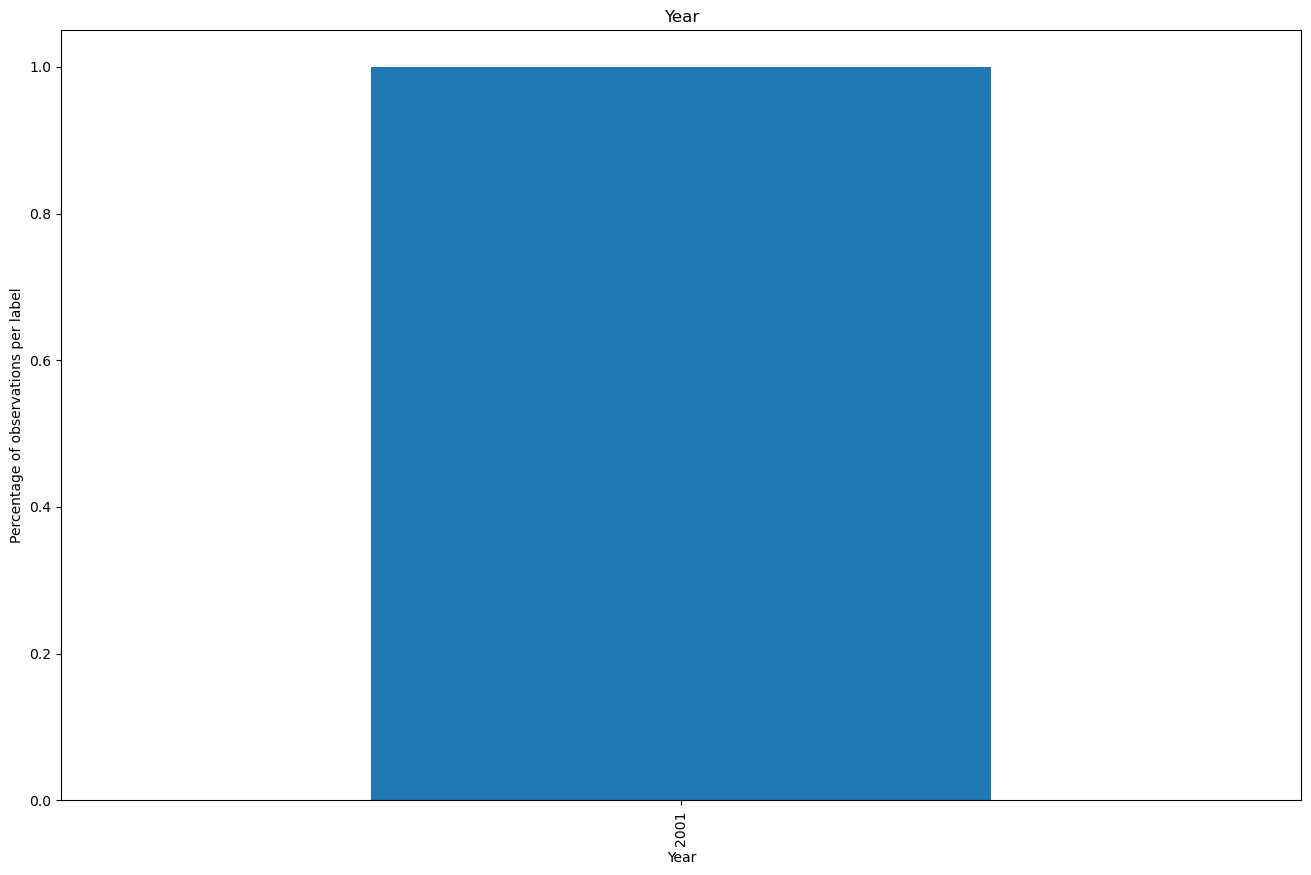

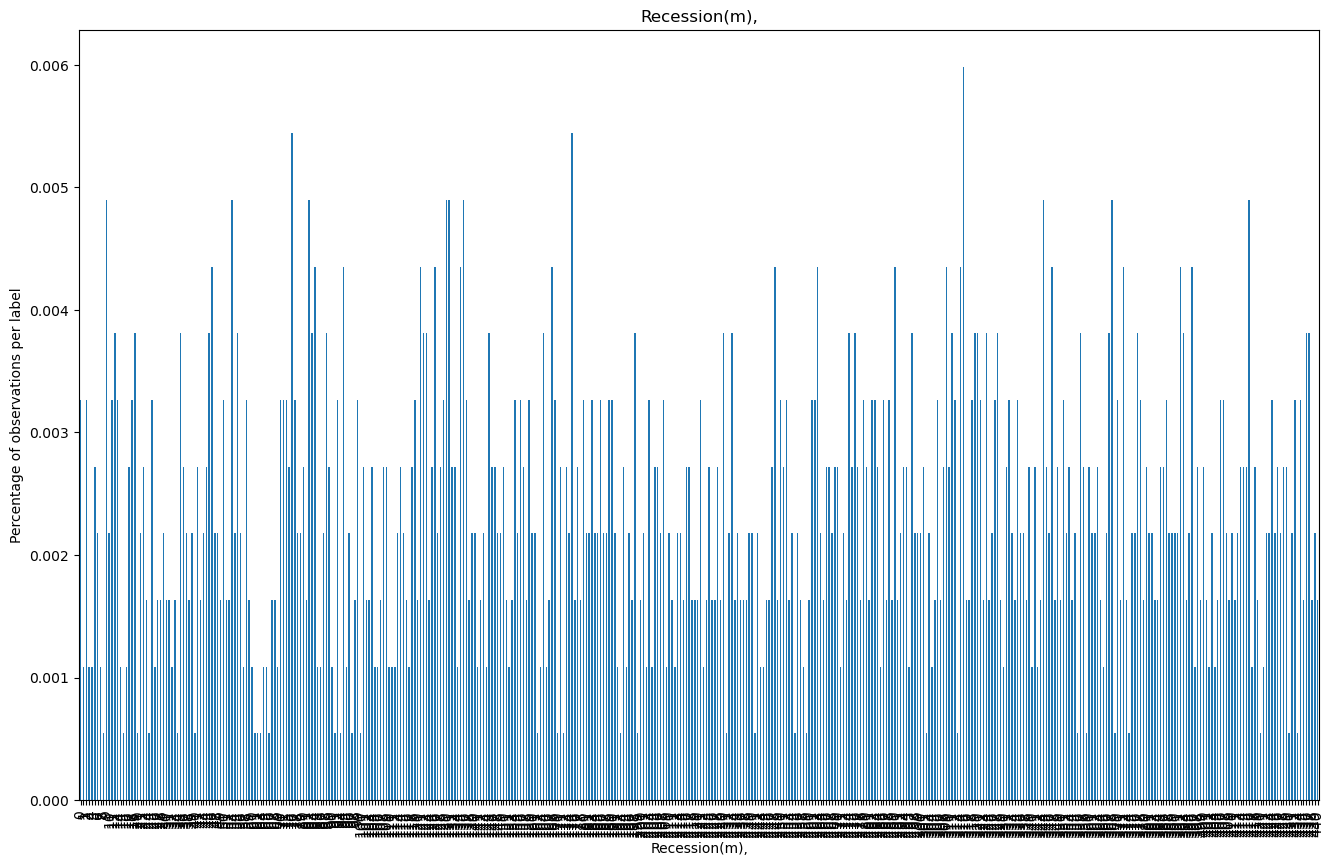

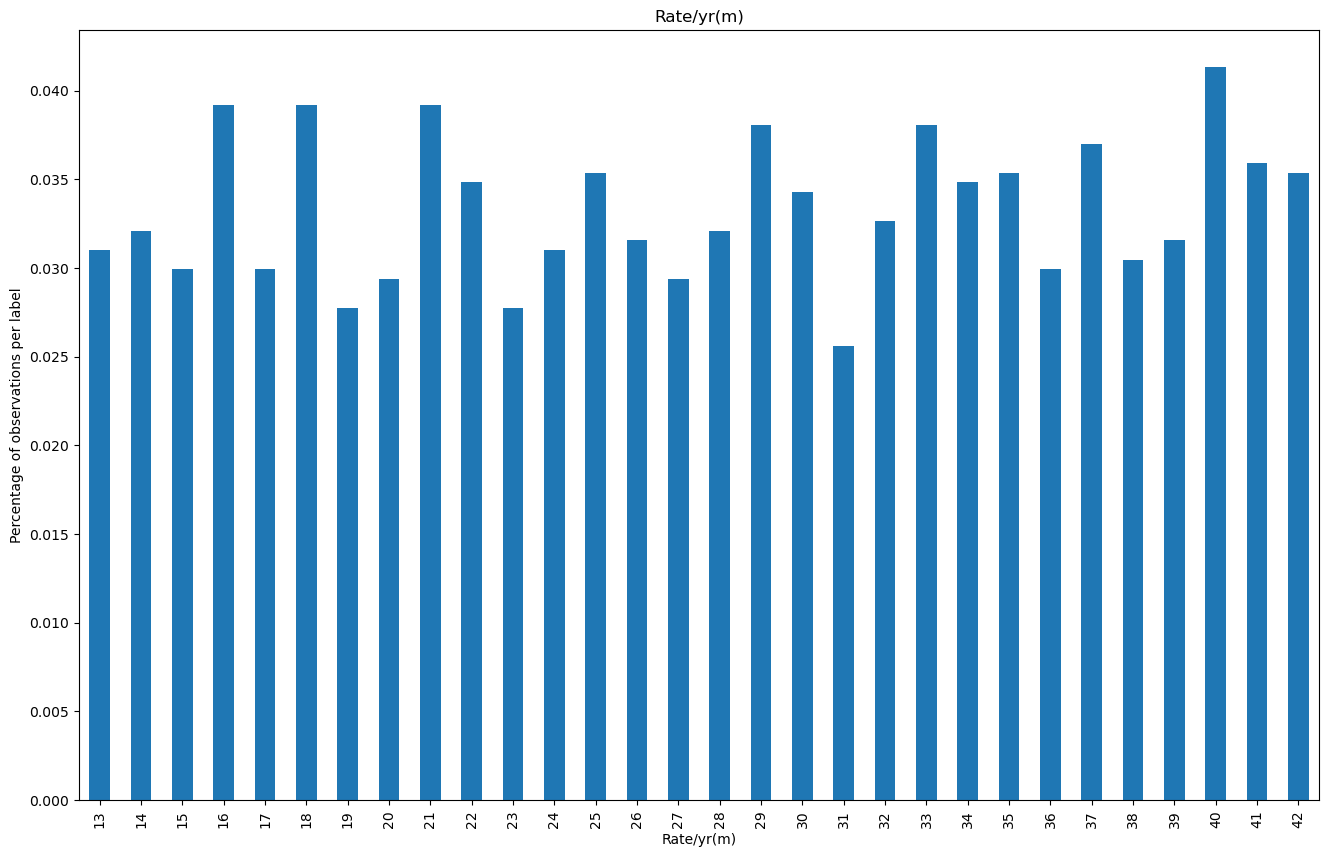

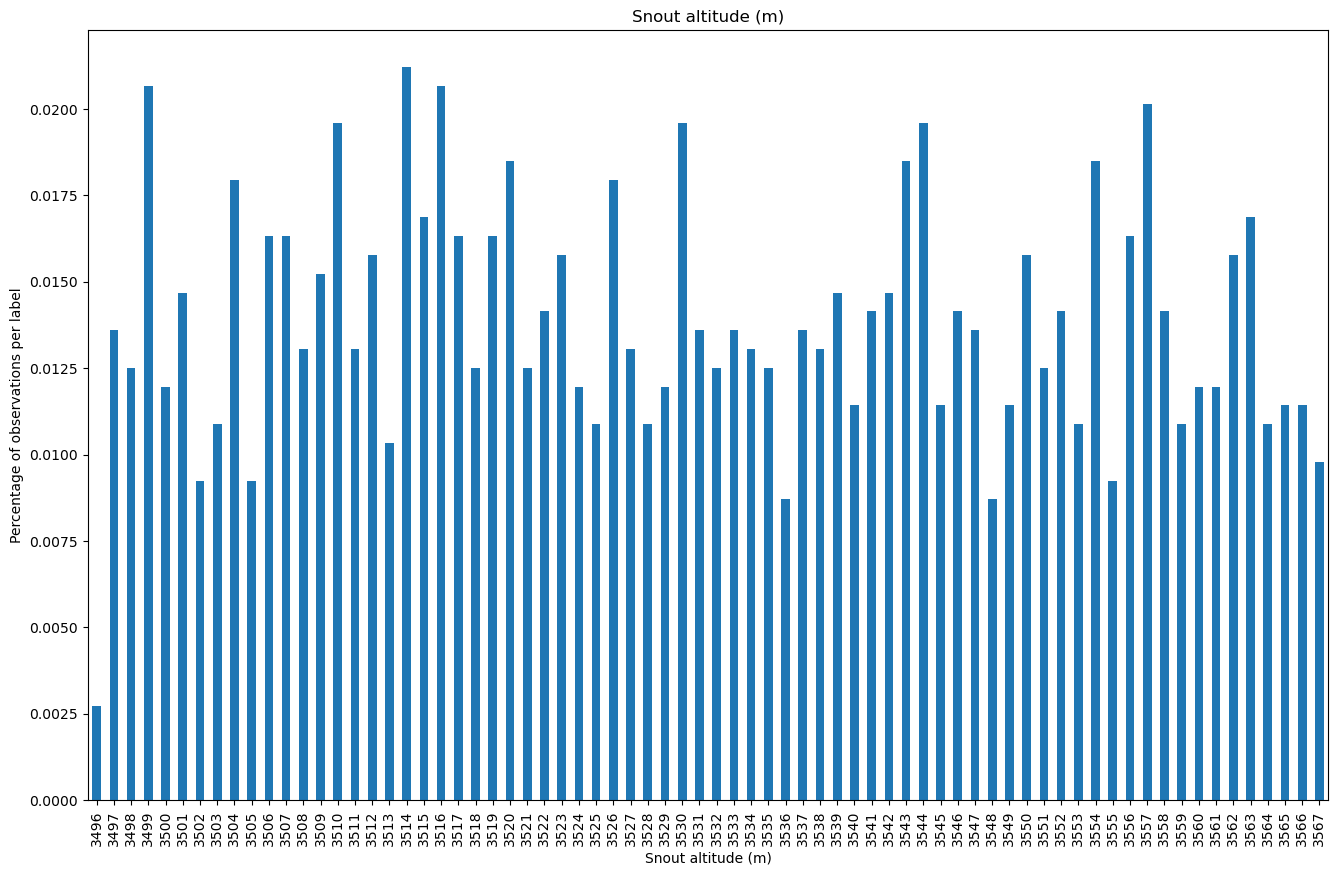

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()